In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [50]:
insurance=pd.read_csv('insurance.csv')

In [51]:
insurance.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Data cleaning

In [5]:
insurance.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [6]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance.shape

(1338, 7)

In [8]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Data analysis

In [9]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [11]:
insurance['smoker'].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

In [12]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [13]:
#plt.countplot(x='sex',data=insurance)

<Figure size 600x600 with 0 Axes>

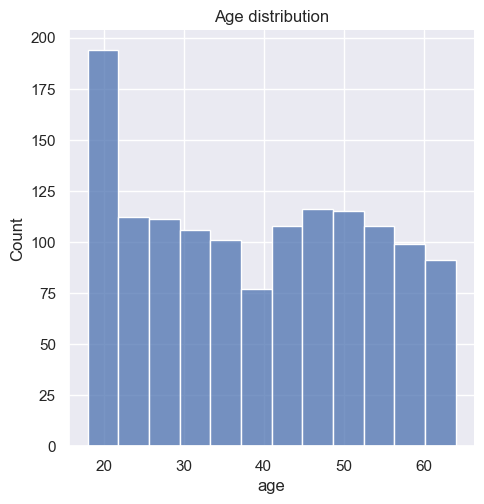

In [14]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance['age'])
plt.title('Age distribution')
plt.show()

# visualization

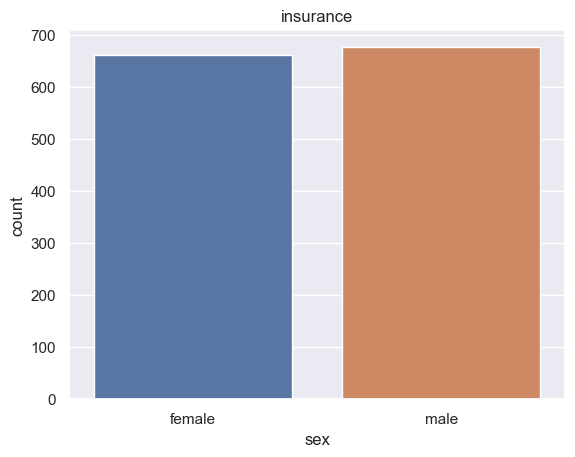

In [15]:
sns.countplot(x='sex',data=insurance)

plt.title('insurance')
plt.show()

<Figure size 600x600 with 0 Axes>

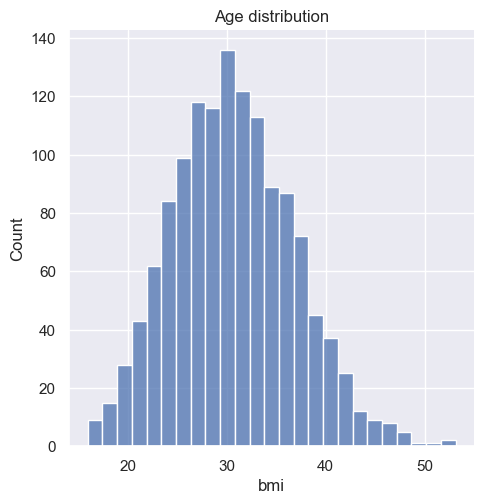

In [16]:

plt.figure(figsize=(6,6))
sns.displot(insurance['bmi'])
plt.title('Age distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

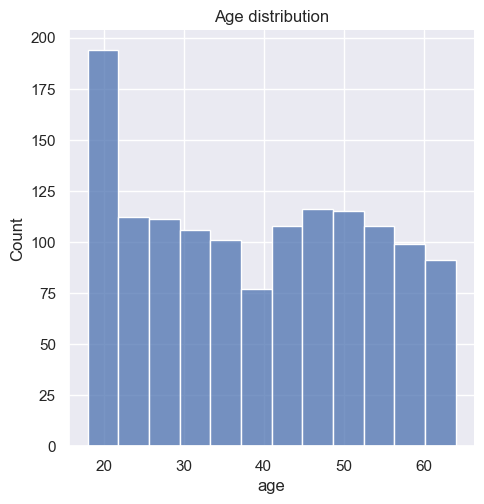

In [17]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance['age'])
plt.title('Age distribution')
plt.show()

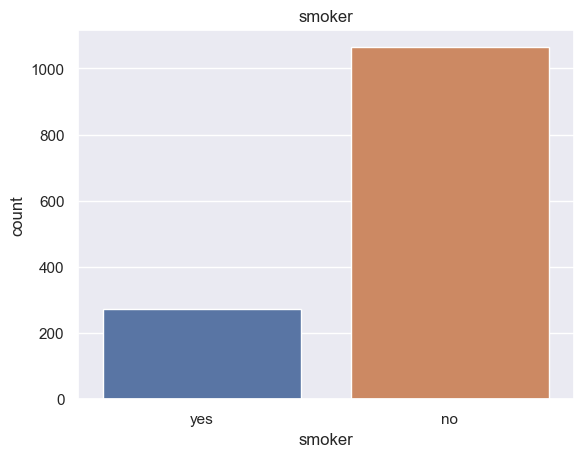

In [18]:
sns.countplot(x='smoker',data=insurance)

plt.title('smoker')
plt.show()

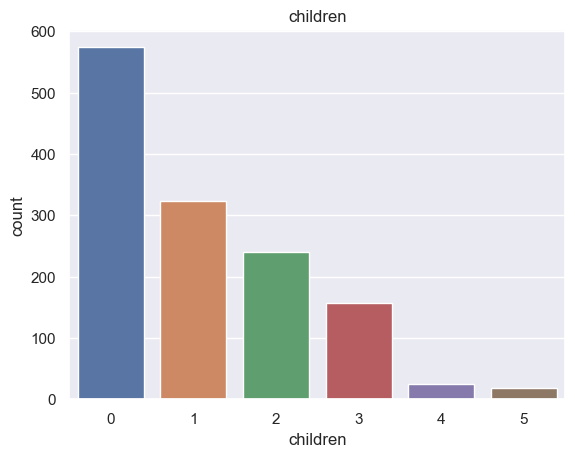

In [19]:
sns.countplot(x='children',data=insurance)

plt.title('children')
plt.show()

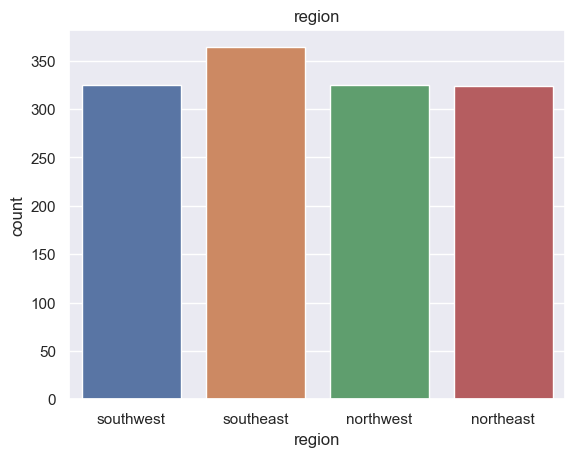

In [20]:
sns.countplot(x='region',data=insurance)

plt.title('region')
plt.show()

In [21]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 600x600 with 0 Axes>

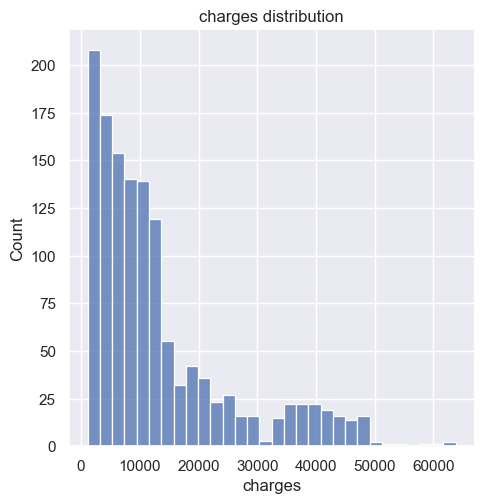

In [22]:
plt.figure(figsize=(6,6))
sns.displot(insurance ['charges'])
plt.title('charges distribution')
plt.show()

In [126]:
label_encoder = LabelEncoder()


insurance['sex']=label_encoder.fit_transform(insurance['sex'])
insurance['smoker']=label_encoder.fit_transform(insurance['smoker'])
insurance['region']=label_encoder.fit_transform(insurance['region'])

In [127]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [128]:
x = insurance.drop(['charges'], axis = 1)
y = insurance['charges']

In [129]:
print(x)


      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


In [130]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# SPLIT AND TEST

In [143]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=3)

In [144]:
print (x.shape, x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


# MODEL TRAINING

In [145]:
# using linear regression
lm=LinearRegression()

In [146]:
lm.fit(x_train, y_train)

LinearRegression()

# Model evaluation

In [147]:
training_data_prediction = lm.predict(x_train)

In [148]:
r2_train = r2_score(y_train, training_data_prediction)
print('R squared value for training data:', r2_train)


R squared value for training data: 0.7530732192579027


In [149]:
testing_data_prediction = lm.predict(x_test)

In [150]:
r2_test = metrics.r2_score(y_test, testing_data_prediction)
print('R squared value for testing data :', r2_test)

R squared value for testing data : 0.740625673859792


In [151]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Building a predictive system

In [152]:
input_data = (19,0,27.900,0,1,3)
# changing input data to a numpy array from a turple
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

#19,female,27.9,0,yes,southwest,16884.924
prediction =  lm.predict(input_data_reshape)
print(prediction)

print('The Insurance cost is USD', prediction[0])


[24839.53477957]
The Insurance cost is USD 24839.534779573438


C:\Users\WILSONA\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [153]:
from sklearn.neighbors import KNeighborsClassifier
KN_model=KNeighborsClassifier(n_neighbors=4)
KN_model.fit(x_train,y_train)

ValueError: Unknown label type: 'continuous'